<a href="https://colab.research.google.com/github/tushar-lawande/Data-Science-Project-Code-Soft/blob/main/IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset Description:
       sepal_length   sepal_width  petal_length   petal_width
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02
mean  -4.736952e-16 -6.631732e-16  3.315866e-16 -2.842171e-16
std    1.003350e+00  1.003350e+00  1.003350e+00  1.003350e+00
min   -1.870024e+00 -2.438987e+00 -1.568735e+00 -1.444450e+00
25%   -9.006812e-01 -5.877635e-01 -1.227541e+00 -1.181504e+00
50%   -5.250608e-02 -1.249576e-01  3.362659e-01  1.332259e-01
75%    6.745011e-01  5.692513e-01  7.627586e-01  7.905908e-01
max    2.492019e+00  3.114684e+00  1.

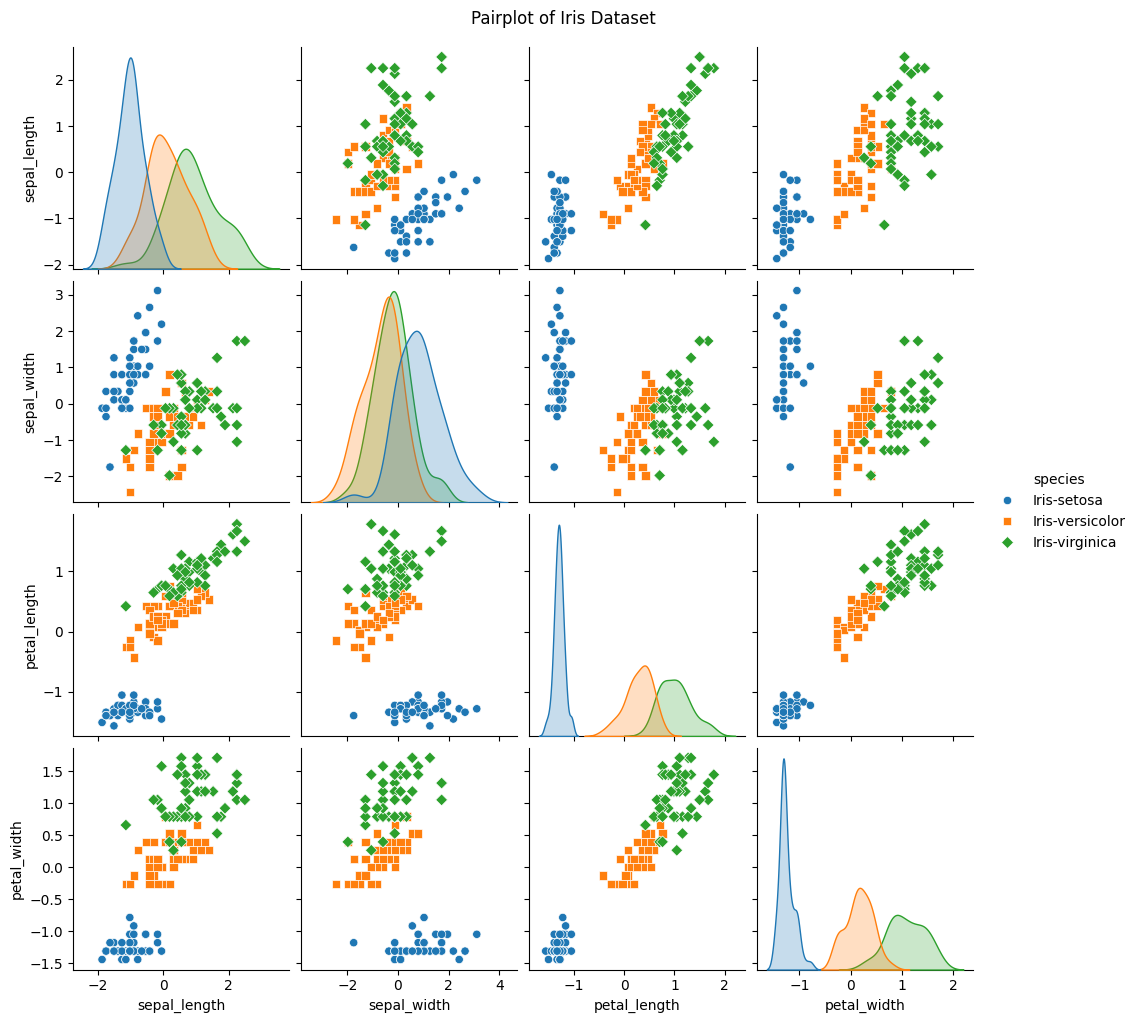

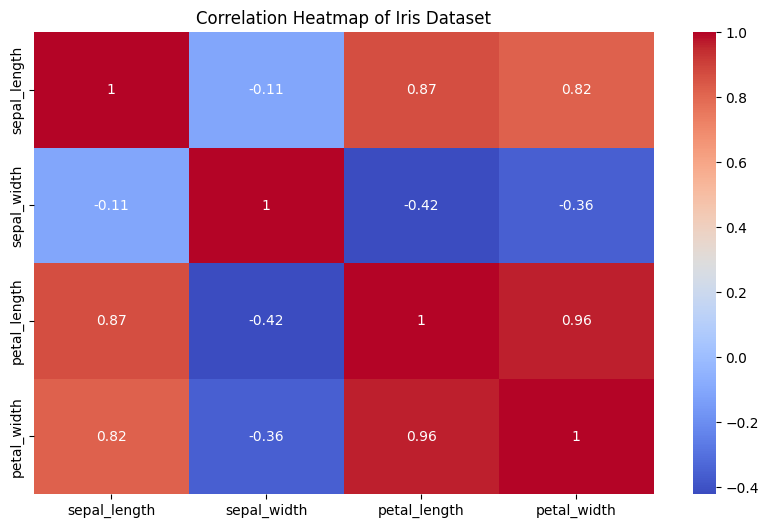


Accuracy: 1.00

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


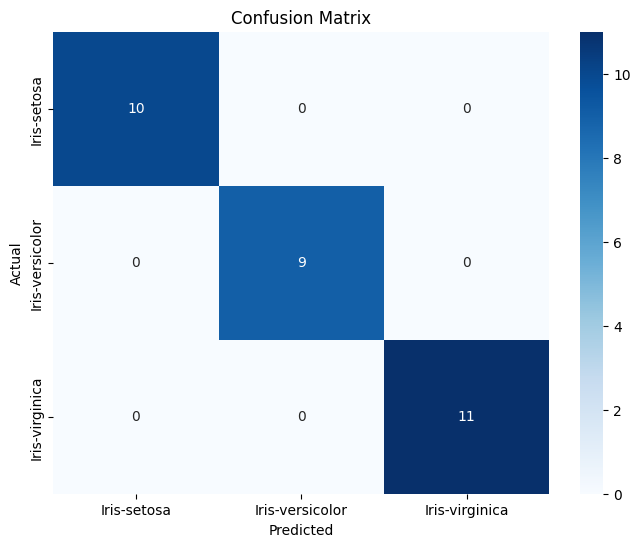


Feature Importances:
        Feature  Importance
2  petal_length    0.439994
3   petal_width    0.421522
0  sepal_length    0.108098
1   sepal_width    0.030387


<ipython-input-1-b7ea4bdbc21e>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


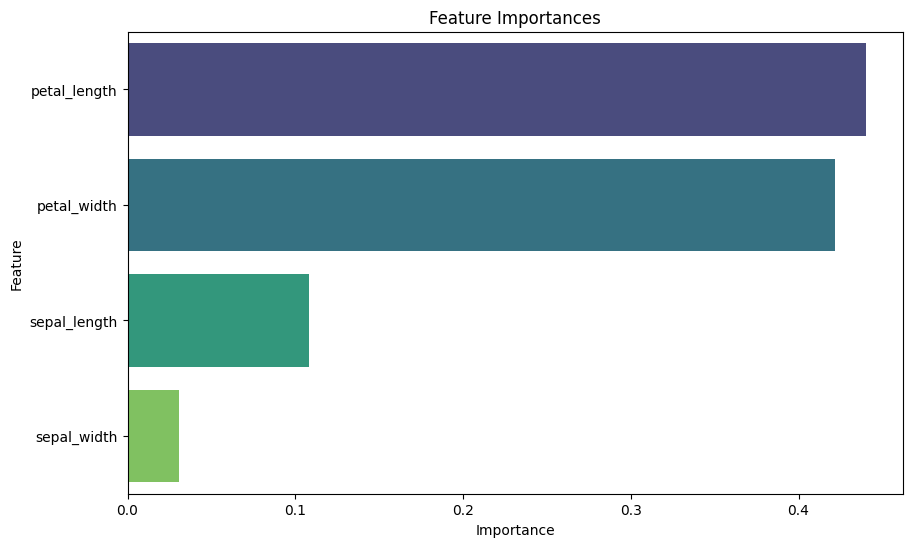

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset from a CSV file
dataset_path = '/content/IRIS.csv'  # Replace with your dataset path
iris_df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(iris_df.head())

# Data Preprocessing (if needed)
# In this case, the data is already clean and does not need much preprocessing
# However, for demonstration, let's normalize the feature data
features = iris_df.columns[:-1]  # All columns except the last one
scaler = StandardScaler()
iris_df[features] = scaler.fit_transform(iris_df[features])

# Exploratory Data Analysis (EDA)
print("\nDataset Description:")
print(iris_df.describe())

print("\nSpecies Distribution:")
print(iris_df['species'].value_counts())

# Pairplot for visualizing relationships between features
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

# Heatmap of feature correlations
numeric_cols = iris_df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = iris_df[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Iris Dataset")
plt.show()

# Split the data into features (X) and target (y)
X = iris_df[features].values
y = iris_df['species'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
feature_importances = clf.feature_importances_
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_df)

# Visualization of Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Feature Importances')
plt.show()
